<a href="https://colab.research.google.com/github/ayushpandey1/Tweets_Classification/blob/master/TweetsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [21]:
from google.colab import files
uploaded=files.upload() 

Saving Login.csv to Login (1).csv


In [22]:
log=pd.read_csv('Login.csv')


In [23]:
consumerKey=log['key'][0]
consumerSecret=log['key'][1]
accessToken=log['key'][2]
accessTokenSecret=log['key'][3]

In [24]:
authenticate=tweepy.OAuthHandler(consumerKey,consumerSecret)
authenticate.set_access_token(accessToken,accessTokenSecret)
api=tweepy.API(authenticate,wait_on_rate_limit=True)

In [25]:
posts=api.user_timeline(screen_name="BillGates",count=100,lang="en",tweet_mode="extended")
print("show the 5 recent tweets:\n")
for tweet in posts[0:5]:
  print(tweet.full_text+'\n')

show the 5 recent tweets:

Mosquito City is home to the world’s largest captive colony of mosquitoes. @IfakaraHealth Institute is doing fascinating research there about mosquito behaviors and finding ways to outsmart them. https://t.co/p3r11gMqdn

Deaths from malaria have been cut by more than half since the year 2000. Increased bed net use is one of the main reasons why https://t.co/qxMqqCUs11 #WorldMosquitoDay

RT @gavi: Vaccines prevent millions of deaths every year by harnessing the body’s immune system to create defences against future infection…

Ridding the world of preventable, treatable diseases like malaria will save millions of lives and lead to healthier, more prosperous communities. And that will make them better prepared to confront any new health challenges like COVID-19 in the future. https://t.co/6AbgoLSVai https://t.co/D6xm7XeuBH

RT @GlobalFund: As a community health worker in Kenya’s Homa Bay County, Evaline has helped her community dramatically reduce the number of

In [26]:
df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])
df.head()

,Tweets
0,Mosquito City is home to the world’s largest c...
1,Deaths from malaria have been cut by more than...
2,RT @gavi: Vaccines prevent millions of deaths ...
3,"Ridding the world of preventable, treatable di..."
4,RT @GlobalFund: As a community health worker i...


In [27]:
#Clean the text
#Create a function to clean the tweets
def cleanTxt(text):
  text=re.sub(r'@[A-Za-z0-9]+','',text)#removed @mentions
  text=re.sub(r'#','',text)#Removing the '#' symbol
  text=re.sub(r'RT[\s]+','',text)#Removing RT
  text=re.sub(r'https?:\/\/\S+','',text)#Remove the hyper links
  return text

#Cleaning the text
df['Tweets']=df['Tweets'].apply(cleanTxt)

#Show the cleaned text
df

,Tweets
0,Mosquito City is home to the world’s largest c...
1,Deaths from malaria have been cut by more than...
2,: Vaccines prevent millions of deaths every ye...
3,"Ridding the world of preventable, treatable di..."
4,: As a community health worker in Kenya’s Homa...
...,...
95,I’m connecting live with and to talk about w...
96,Thanks for joining me yesterday to discuss th...
97,I’m answering your questions about the COVID19...
98,I know many parents are looking for resources ...


In [28]:
#Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create 2 new columns
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)
#Show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,Mosquito City is home to the world’s largest c...,0.725000,0.450000
1,Deaths from malaria have been cut by more than...,0.250000,0.125000
2,: Vaccines prevent millions of deaths every ye...,0.125000,0.000000
3,"Ridding the world of preventable, treatable di...",0.394886,0.284091
4,: As a community health worker in Kenya’s Homa...,0.000000,0.000000
...,...,...,...
95,I’m connecting live with and to talk about w...,0.312500,0.068182
96,Thanks for joining me yesterday to discuss th...,0.100000,0.100000
97,I’m answering your questions about the COVID19...,0.000000,0.000000
98,I know many parents are looking for resources ...,0.250000,0.250000


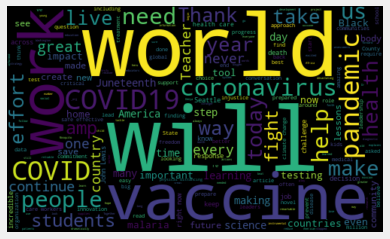

In [29]:
#Plot the word cloud
allWords=' '.join([twts for twts in df['Tweets']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [30]:
#Create a function to compute the negative,neutral and positive analysis
def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['Polarity'].apply(getAnalysis)
#show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Mosquito City is home to the world’s largest c...,0.725000,0.450000,Positive
1,Deaths from malaria have been cut by more than...,0.250000,0.125000,Positive
2,: Vaccines prevent millions of deaths every ye...,0.125000,0.000000,Neutral
3,"Ridding the world of preventable, treatable di...",0.394886,0.284091,Positive
4,: As a community health worker in Kenya’s Homa...,0.000000,0.000000,Neutral
...,...,...,...,...
95,I’m connecting live with and to talk about w...,0.312500,0.068182,Positive
96,Thanks for joining me yesterday to discuss th...,0.100000,0.100000,Positive
97,I’m answering your questions about the COVID19...,0.000000,0.000000,Neutral
98,I know many parents are looking for resources ...,0.250000,0.250000,Positive


In [31]:
#Print all of the positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Positive'):
    print(str(j)+') '+sortedDF['Tweets'][i])
    print()
    j=j+1

1) Mosquito City is home to the world’s largest captive colony of mosquitoes.  Institute is doing fascinating research there about mosquito behaviors and finding ways to outsmart them. 

2) Deaths from malaria have been cut by more than half since the year 2000. Increased bed net use is one of the main reasons why  WorldMosquitoDay

3) Ridding the world of preventable, treatable diseases like malaria will save millions of lives and lead to healthier, more prosperous communities. And that will make them better prepared to confront any new health challenges like COVID-19 in the future.  

4) The progress the world has made against malaria is one of the greatest success stories ever. The COVID-19 pandemic only reinforces why eradicating malaria is so essential. 

5) : A safe and effective COVID19 vaccine is the way out of this devastating pandemic🌍

Our Director of Vaccine R&amp;D, Melanie…

6) Teaching special education takes an amazing person to figure out exactly what works for each ch

In [32]:
#print the negative tweets
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+') '+ sortedDF['Tweets'][i])
    print()
    j=j+1

1) Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be disastrous for these young people and for the country. Here’s what we’re doing to help: 

2) : Three lessons that have been central to the COVID19 response in South Africa, Liberia, &amp; other countries:
🔸 Screening…

3) Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year.  founded _Tele to address this often-overlooked challenge. 

4) : “It’s that clarity of language about the VALUE of black life in America that distinguishes Juneteenth as emancipation…

5) : “Only those feigning blindness fail to see the body of work we are, and the work of body we have done. 

Everything is what it is…

6) : Juneteenth recognizes &amp; celebrates Black people’s freedom and the end of slavery in the US!  19 Jun 1865 Union Army Genera…

7) _Nyongo: 1. This is 

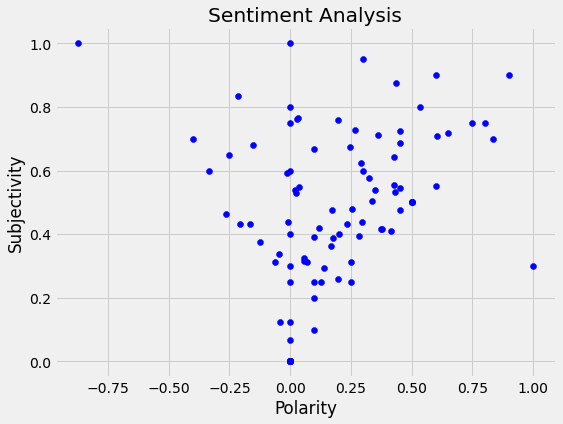

In [33]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [34]:
#get the % of positive tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']
round((ptweets.shape[0]/df.shape[0])*100,1)

63.0

In [35]:
#get the % of negative tweets
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['Tweets']
round((ntweets.shape[0]/df.shape[0])*100,1)

15.0

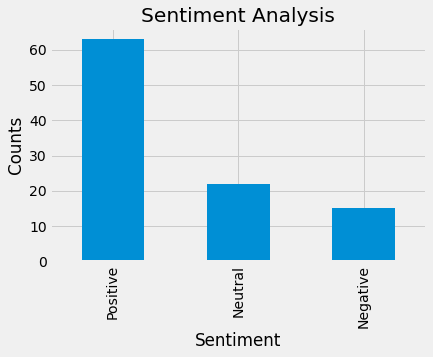

In [36]:
#Show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()